In [135]:
%matplotlib notebook

In [136]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint

In [137]:
#this tells me what files are in the directory 
!ls

HIC_bedcount.csv              homeless_count2018.csv
Homelessness in the US .ipynb top_ten_chart.png
clean_census_data.csv


In [138]:
# File to Load
homelesscount_data = 'homeless_count2018.csv'
clean_census_data = 'clean_census_data.csv'
bedcount_data = 'HIC_bedcount.csv'

In [139]:
# Reading the homeless_count2018 Data
homelesscount_data_df = pd.read_csv(homelesscount_data)
clean_census_data_df = pd.read_csv(clean_census_data)
bedcount_data_df = pd.read_csv(bedcount_data)

In [140]:
# Combining the data into a single dataset
combined_census_homelesscount_df = pd.merge(clean_census_data_df, homelesscount_data_df, on='State')

combined_census_homelesscount_df.head()

combined_census_homelesscount_bed_df = pd.merge(combined_census_homelesscount_df, bedcount_data_df, on= 'State')

combined_census_homelesscount_bed_df.head()

,State,NAME,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,NE,Northeast Region,56111079,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
1,NE,Nebraska,1929268,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
2,AL,Alabama,4887871,8,"3,434","1,519",865,40,"2,424","1,010",...,0,0,0,0.00%,0,0,0,0,0,0
3,AK,Alaska,737438,2,"2,016","1,248",459,0,"1,707",309,...,71,71,71,100.00%,0,0,71,0,0,0
4,AZ,Arizona,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [141]:
# Set new index to name
df = combined_census_homelesscount_bed_df.set_index("NAME")
df.head()

,State,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018","Homeless Individuals, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
NAME,,,,,,,,,,,,,,,,,,,,,
Northeast Region,NE,56111079,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Nebraska,NE,1929268,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Alabama,AL,4887871,8,"3,434","1,519",865,40,"2,424","1,010","2,570",...,0,0,0,0.00%,0,0,0,0,0,0
Alaska,AK,737438,2,"2,016","1,248",459,0,"1,707",309,"1,434",...,71,71,71,100.00%,0,0,71,0,0,0
Arizona,AZ,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066","7,259",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [142]:
# Reorganizing the columns using double brackets
organized_df = df[["POP_ESTIMATE_2018","Overall Homeless, 2018"]]
organized_df.head()

,POP_ESTIMATE_2018,"Overall Homeless, 2018"
NAME,,
Northeast Region,56111079,"2,421"
Nebraska,1929268,"2,421"
Alabama,4887871,"3,434"
Alaska,737438,"2,016"
Arizona,7171646,"9,865"


In [143]:
# Using .rename(columns={}) in order to rename columns
renamed_df = organized_df.rename(columns={"POP_ESTIMATE_2018":"Pop_2018", "Overall Homeless, 2018":"Homeless_Pop_2018"})
renamed_df.head()

,Pop_2018,Homeless_Pop_2018
NAME,,
Northeast Region,56111079,"2,421"
Nebraska,1929268,"2,421"
Alabama,4887871,"3,434"
Alaska,737438,"2,016"
Arizona,7171646,"9,865"


In [144]:
renamed_df.head(63)

,Pop_2018,Homeless_Pop_2018
NAME,,
Northeast Region,56111079,"2,421"
Nebraska,1929268,"2,421"
Alabama,4887871,"3,434"
Alaska,737438,"2,016"
Arizona,7171646,"9,865"
Arkansas,3013825,"2,712"
California,39557045,"129,972"
Colorado,5695564,"10,857"
Connecticut,3572665,"3,976"


In [145]:
renamed_df = renamed_df.drop(["Northeast Region"], axis=0)
renamed_df

,Pop_2018,Homeless_Pop_2018
NAME,,
Nebraska,1929268,"2,421"
Alabama,4887871,"3,434"
Alaska,737438,"2,016"
Arizona,7171646,"9,865"
Arkansas,3013825,"2,712"
California,39557045,"129,972"
Colorado,5695564,"10,857"
Connecticut,3572665,"3,976"
Delaware,967171,"1,082"


In [146]:
renamed_df.dtypes

Pop_2018              int64
Homeless_Pop_2018    object
dtype: object

In [147]:
renamed_df['Homeless_Pop_2018'] = renamed_df['Homeless_Pop_2018'].str.replace(',','')
renamed_df

,Pop_2018,Homeless_Pop_2018
NAME,,
Nebraska,1929268,2421
Alabama,4887871,3434
Alaska,737438,2016
Arizona,7171646,9865
Arkansas,3013825,2712
California,39557045,129972
Colorado,5695564,10857
Connecticut,3572665,3976
Delaware,967171,1082


In [148]:
renamed_df['Homeless_Pop_2018'].astype('float')

NAME
Nebraska                  2421.0
Alabama                   3434.0
Alaska                    2016.0
Arizona                   9865.0
Arkansas                  2712.0
California              129972.0
Colorado                 10857.0
Connecticut               3976.0
Delaware                  1082.0
District of Columbia      6904.0
Florida                  31030.0
Georgia                   9499.0
Hawaii                    6530.0
Idaho                     2012.0
Illinois                 10643.0
Indiana                   5258.0
Iowa                      2749.0
Kansas                    2216.0
Kentucky                  3688.0
Louisiana                 3059.0
Maine                     2516.0
Maryland                  7144.0
Massachusetts            20068.0
Michigan                  8351.0
Minnesota                 7243.0
Mississippi               1352.0
Missouri                  5883.0
Montana                   1405.0
Nevada                    7544.0
New Hampshire             1450.0
New J

In [149]:
# Sorting the DataFrame based on "Pop_2018" column
# To sort from highest to lowest, ascending=False must be passed in
top_df = renamed_df.sort_values("Pop_2018",ascending=False)
top_df.head(10)

,Pop_2018,Homeless_Pop_2018
NAME,,
California,39557045,129972
Texas,28701845,25310
Florida,21299325,31030
New York,19542209,91897
Pennsylvania,12807060,13512
Illinois,12741080,10643
Ohio,11689442,10249
Georgia,10519475,9499
North Carolina,10383620,9268


In [156]:
top_ten_pop_df = top_df.loc[(top_df["Pop_2018"] >= 9000000)]
top_ten_pop_df.head(12)

,Pop_2018,Homeless_Pop_2018
NAME,,
California,39557045,129972
Texas,28701845,25310
Florida,21299325,31030
New York,19542209,91897
Pennsylvania,12807060,13512
Illinois,12741080,10643
Ohio,11689442,10249
Georgia,10519475,9499
North Carolina,10383620,9268


<IPython.core.display.Javascript object>


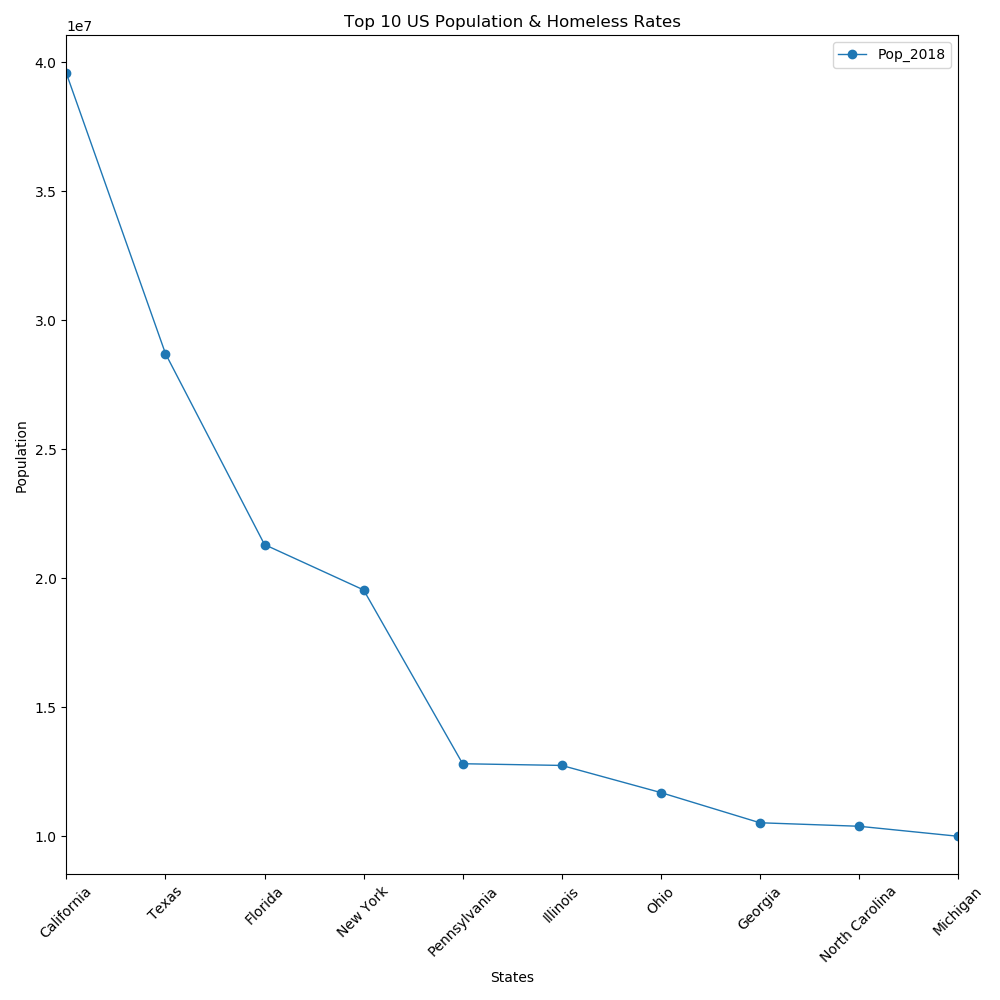

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

In [190]:
#top_ten_pop_df["Homeless_Pop_2018"] = top_ten_pop_df["Homeless_Pop_2018"].astype(int) 
top_ten_pop = top_ten_pop_df.plot(kind='line', figsize=(10,10), linewidth=1, marker="o")


plt.show()

# Give our graph axis labels
plt.title("Top 10 US Population & Homeless Rates")
plt.xlabel("States")
plt.ylabel("Population")
plt.xticks(rotation=45)
#plt.ylim(0, 50000000)
#plt.xlim(0, 9)
#top_ten_pop_df.dtypes

In [191]:
plt.tight_layout()
plt.savefig("../project1_data/top_ten_chart.png")
plt.show()

In [57]:
# Plot the top 10 US states population as a line chart
top_ten.plot('Pop_2018', color="blue", label="Top Ten US Pop" )

# Plot the homeless population in those top 10 states as a line chart
top_ten.plot('Homeless_Pop_2018', color="green", label="Top Ten Homeless Pop")

# Create a legend for our chart
#plt.legend(handles=[top_ten, homeless_pop], loc="best")

# Show the chart
plt.show()

AttributeError: 'list' object has no attribute 'plot'

In [39]:
# Will sort from lowest to highest if no other parameter is passed
bottom_df = renamed_df.sort_values("Pop_2018")
bottom_df.head(10)

,Pop_2018,Homeless_Pop_2018
NAME,,
Wyoming,577737,639
Vermont,626299,1291
District of Columbia,702455,6904
Alaska,737438,2016
North Dakota,760077,542
South Dakota,882235,1159
Delaware,967171,1082
Rhode Island,1057315,1101
Montana,1062305,1405


In [44]:
bottom_ten = top_df.loc[(top_df["Pop_2018"] <= 1350000)]
bottom_ten.head(12)

,Pop_2018,Homeless_Pop_2018
NAME,,
Maine,1338404,2516
Montana,1062305,1405
Rhode Island,1057315,1101
Delaware,967171,1082
South Dakota,882235,1159
North Dakota,760077,542
Alaska,737438,2016
District of Columbia,702455,6904
Vermont,626299,1291


In [ ]:
# Labels for the sections of our pie chart 
labels = ["Veterans", "Unaccompanied Minors Under 18", "Families"]

# The values of each section of the pie chart
sizes = [#, #, #, #]

# The colors of each section of the pie chart
colors = [" ", " ", " ", " "]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

In [ ]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")